Importing Necessary Libraries

In [37]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Loading The Train Dataset Using Pandas

In [38]:
# Loading the data into a pandas dataframe
train_titanic = pd.read_csv("Titanic Dataset (Complete).csv")
train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Data Preprocessing

In [39]:
# Checking the number of rows and columns
train_titanic.shape

(1309, 12)

In [40]:
# 11 columns - feature columns, 1 column (survived) - target column
# Getting information about the data
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [41]:
# Getting number of missing columns in each column
train_titanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Axes: >

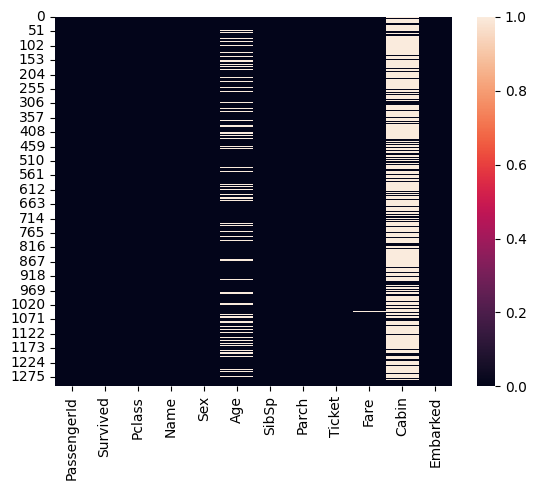

In [42]:
# Visualizing missing values using seaborn's heatmap
sns.heatmap(train_titanic.isna())

Handling The Missing Values

In [43]:
# Handling the missing values in the dataset
# Majority of cabin column data is missing - so, DROP THAT COLUMN from the dataframe
train_titanic = train_titanic.drop(columns = "Cabin", axis = 1)

In [44]:
# Handling the age column - we can't drop this column since there are many values available
# Replacing all missing values of age column with the mean age of all the available age values
# inplace = true - to make the below action get saved in the original dataframe
train_titanic['Age'].fillna(train_titanic['Age'].mean(), inplace = True)
train_titanic['Fare'].fillna(train_titanic['Fare'].mean(), inplace = True)

In [45]:
# Mode - value which is repeated most number of times
# Finding mode value of 'Embarked' column
print(train_titanic['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [46]:
print(train_titanic['Embarked'].mode()[0])

S


In [47]:
# Replacing missing values in Embarked column with Mode value
train_titanic['Embarked'].fillna(train_titanic['Embarked'].mode()[0], inplace = True)

In [48]:
# Getting number of missing columns in each column once again
train_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis And Visualization

In [49]:
# Getting statistical information about the data
# Getting number of missing columns in each column
train_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,12.883193,1.041658,0.865560,51.738879
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,29.881138,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [50]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


In [51]:
# Finding number of people who survived and not survived
train_titanic['Survived'].value_counts()

Survived
0    815
1    494
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

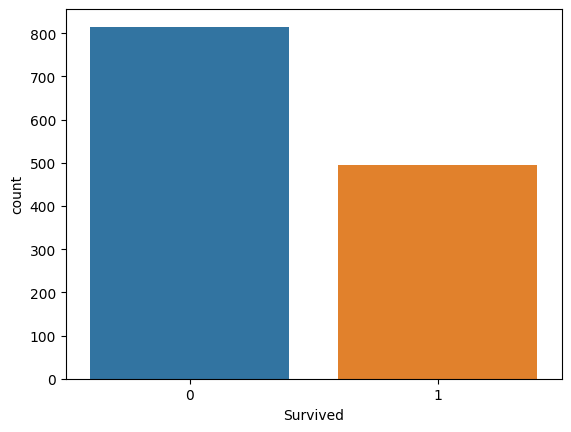

In [52]:
# Visualizing how many survived and how many didn't
sns.countplot(x = 'Survived', data = train_titanic)

In [53]:
# Counting total number of males and females
train_titanic['Sex'].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

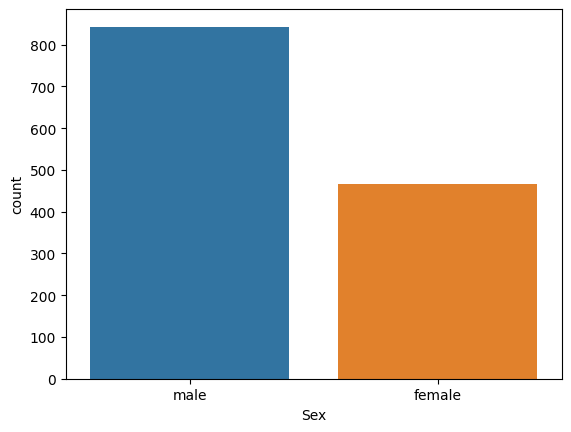

In [54]:
# Another countplot to check how many are male and how many are female
sns.countplot(x = 'Sex', data = train_titanic)

<Axes: xlabel='Sex', ylabel='count'>

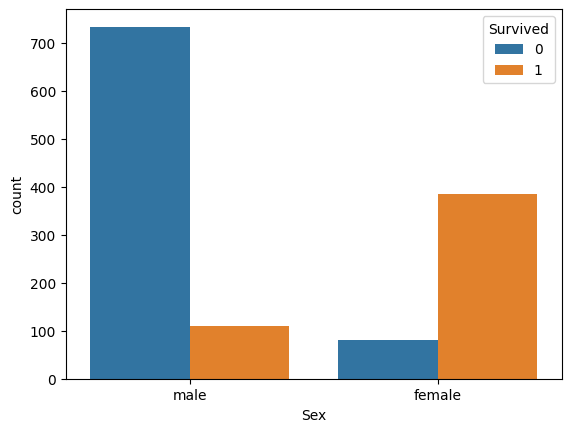

In [55]:
# Comparing number of survivors genderwise
sns.countplot(x = 'Sex', hue = 'Survived', data = train_titanic)

<Axes: xlabel='Pclass', ylabel='count'>

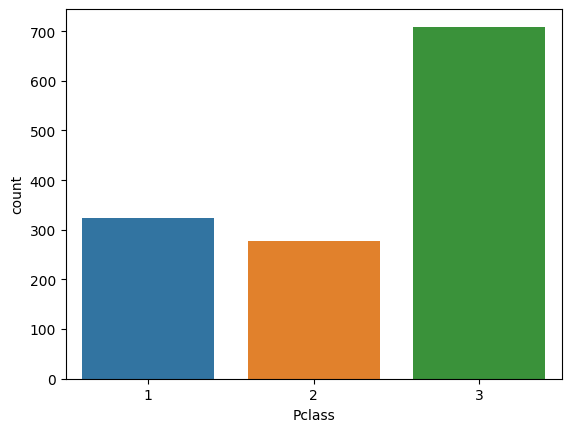

In [56]:
# Making countplot for pclass column
sns.countplot(x = 'Pclass', data = train_titanic)

<Axes: xlabel='Pclass', ylabel='count'>

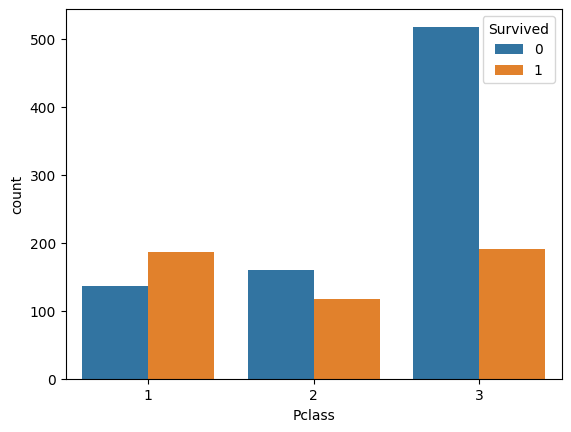

In [57]:
# Comparing number of survivors based on pclass column
sns.countplot(x = 'Pclass', hue = 'Survived', data = train_titanic)

Encoding Categorical Columns To Numerical Values

In [58]:
# Dropping Name column, taking Sex and Embarked column and replacing their values with meaningful numeric values
#'Sex'and 'Embarked' - categorical columns; process that will be done now is: encoding categorical columns
train_titanic['Sex'].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

In [59]:
train_titanic['Embarked'].value_counts()

Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

Converting Categorical Columns

In [60]:
train_titanic.replace({'Sex': {'male':0, 'female':1}, 'Embarked': {'S':0, 'C':1, 'Q':2}}, inplace = True)
train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",0,29.881138,0,0,A.5. 3236,8.0500,0
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,1
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,0
1307,1308,0,3,"Ware, Mr. Frederick",0,29.881138,0,0,359309,8.0500,0


Separating Features And Target

In [61]:
# Separating target column (survive) and the other features
x = train_titanic.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1)
y = train_titanic['Survived']

In [62]:
print("Features: \n", x)
print("\nTarget Column: \n", y)

Features: 
       Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
0          3    0  22.000000      1      0    7.2500         0
1          1    1  38.000000      1      0   71.2833         1
2          3    1  26.000000      0      0    7.9250         0
3          1    1  35.000000      1      0   53.1000         0
4          3    0  35.000000      0      0    8.0500         0
...      ...  ...        ...    ...    ...       ...       ...
1304       3    0  29.881138      0      0    8.0500         0
1305       1    1  39.000000      0      0  108.9000         1
1306       3    0  38.500000      0      0    7.2500         0
1307       3    0  29.881138      0      0    8.0500         0
1308       3    0  29.881138      1      1   22.3583         1

[1309 rows x 7 columns]

Target Column: 
 0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int64


Splitting Data Into Train And Test Data

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

In [64]:
print(x.shape, x_train.shape, x_test.shape)

(1309, 7) (1047, 7) (262, 7)


Training The Model

In [65]:
# Logistic Regression Model
model = LogisticRegression()

In [66]:
# Training the model with training data
model. fit(x_train, y_train)

c:\Users\FATHIMA ISMAIL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluating The Model

In [67]:
# Accuracy score
# Giving just x_train data alone to the trained model, and the model will predict whether the person survived or not
# ACCURACY ON TRAINING DATA
x_train_pred = model.predict(x_train)
x_train_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [68]:
# Training data evaluation score
train_data_accuracy = accuracy_score(y_train, x_train_pred)
print("Training Data Accuracy:", train_data_accuracy)
print("\nConfusion Matrix:\n\n", confusion_matrix(y_train, x_train_pred))
print("\nClassification Report:\n\n", classification_report(y_train, x_train_pred))

Training Data Accuracy: 0.8576886341929322

Confusion Matrix:

 [[593  62]
 [ 87 305]]

Classification Report:

               precision    recall  f1-score   support

           0       0.87      0.91      0.89       655
           1       0.83      0.78      0.80       392

    accuracy                           0.86      1047
   macro avg       0.85      0.84      0.85      1047
weighted avg       0.86      0.86      0.86      1047



In [69]:
# Evaluating model with test data
# ACCURACY ON TEST DATA
x_test_pred = model.predict(x_test)
x_test_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1],
      dtype=int64)

In [70]:
# Test data evaluation score
test_data_accuracy = accuracy_score(y_test, x_test_pred)
print("Test Data Accuracy:", test_data_accuracy)
print("\nConfusion Matrix:\n\n", confusion_matrix(y_test, x_test_pred))
print("\nClassification Report:\n\n", classification_report(y_test, x_test_pred))

Test Data Accuracy: 0.8549618320610687

Confusion Matrix:

 [[146  14]
 [ 24  78]]

Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.91      0.88       160
           1       0.85      0.76      0.80       102

    accuracy                           0.85       262
   macro avg       0.85      0.84      0.84       262
weighted avg       0.85      0.85      0.85       262

